---

# Data Mining:<br>Statistical Modeling and Learning from Data

## Dr. Ciro Cattuto<br>Dr. Laetitia Gauvin<br>Dr. André Panisson

### Exercises - Logistic Regression

---

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Generating data

In the following, we generated 50 samples from a bivariate Gaussian distribution $\mathcal{ N } ((2, 0)^T , I)$ and labeled this class
**RED**. Similarly, 50 more were drawn from $ \mathcal{N} ((0, 2)^T , I)$ and labeled class **GREEN**.

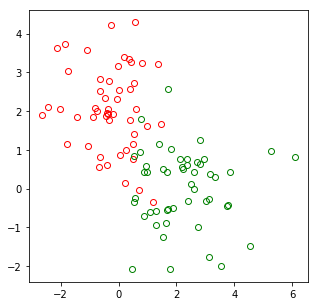

In [10]:
np.random.seed(2) 

nr_samples = 100

# Generate 10 means from two bivariate Gaussian distributions
samples_red   = np.random.multivariate_normal(mean=(0,2), cov=np.identity(2),
                     size=nr_samples//2) 
samples_green = np.random.multivariate_normal(mean=(2,0), 
                    cov=np.identity(2), size=nr_samples//2)

#genero 50 punti rossi, seguendo una distribuzione gaussiana bivariata 
#(cioè una gaussiana 2D, con due variabili), con media in (0,2) e 
#covarianza = identità. Genero anche 50 punti verdi, secondo una distrib.
#bivariata centrata in (2,0)


#queste due variabili sono matrici 50x2: ogni punto ha due coordinate 
#che lo individuano

# Join the red and green datasets as X and the class definitions as y

X = np.concatenate([samples_red, samples_green]) #unica matrice 100x2 che 
                                                 #contiene tutti i punti
y = np.zeros(nr_samples, dtype=int) #creo y = vettore di zeri
y[nr_samples//2:] = 1  #i primi 50 punti valgono 0, gli altri 50 valgono 1

# plot the red and green class points
figure(num=None, figsize=(5, 5))
plot(samples_red[:,0], samples_red[:,1], 'o', mec='r', mfc='none')
plot(samples_green[:,0], samples_green[:,1], 'o', mec='g', mfc='none')


# Exercises

## Exercise 1: Logistic Regression

Find the weight values $\mathbf{w}$ that minimize the error 

$$E_{\mathbf{in}}(\mathbf{w}) = \frac{1}{N} \sum_{n=1}^N 
{ln(1 + e^{-\mathbf{y}_n\mathbf{w}^T\mathbf{x}_n})}$$

For this, implement the Gradient Descent algorithm with $\mathbf{s}$ learning steps and learning rate $\alpha$.  
At each training step, update $\mathbf{w}$ with this rule:

$$\mathbf{w}_i := \mathbf{w}_i - \alpha \Delta E_{\mathbf{in}} $$

where

$$\nabla E_{\mathbf{in}} = - \frac{1}{N} \sum_{n=1}^N 
{\frac{\mathbf{y}_n\mathbf{x}_n}{1 + e^{\mathbf{y}_n\mathbf{w}^T\mathbf{x}_n}}}$$

In [12]:
# prepare the dataset for the matrix manipulations
Xext = np.insert(X, 0, ones(len(X)), axis=1) #X estesa, con prima colonna di 1
                                             #X è una matrice 100x3
y[y==0] = -1

N = Xext.shape[0] #numero punti = num righe della matrice Xext = 100
d = Xext.shape[1] #numero di caratteristiche = num colonne = 3
s = 2000 # learning steps --> passi nella discesa del gradiente
alpha = 10 # learning rate

w = zeros(d)

# YOUR CODE HERE
for step in range(s):
    deltaE = zeros(d)  #inizializzo il  gradiente: vett. di 3 componenti (a zero)
    for n in range(N):
        deltaE = deltaE + (y[n]*Xext[n]) / (1 + np.exp(y[n]*w.T.dot(Xext[n]))) 
    w = w + alpha*deltaE/N
    if np.linalg.norm(deltaE) < 1e-4:
        break


In [13]:
deltaE  #verifico che valori ha il gradiente, se sono praticamente zero vuol
        #dire che sono davvero al minimo

array([ 6.43561594e-05, -7.13938397e-05,  2.78952197e-06])

In [14]:
#ancora meglio: verifichiamo la norma del gradiente:
np.linalg.norm(deltaE)

#nomrmalemente si ha un numero di passi molto alto, e ad ogni passo verifico
#se la norma è sotto un certo valore. Quindi solitamente mi fermo molto prima 
#di fare migliaia di passi.

9.615912351088668e-05

In [15]:
step #mi sono bastati 178 passi per avere un gradiente con norma < 10^-4

178

In [16]:
w #pesi che determinano la funzioe del mio modello

array([-1.49789092,  3.37948789, -1.41264048])

Here we visualize the area which is classified as RED and GREEN

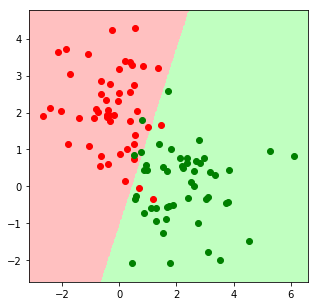

In [19]:
# define the logistic function
def l(x):
    return 1. / (1. + exp(-x))

# define a colormap to colorize the class areas
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('colormap',['#FFC0C0', '#C0FFC0'])

# create a mesh of points that cover the full graph area
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
            np.arange(y_min, y_max, h))

# use the classifier to predict the class of each mesh point
Xtest = np.c_[xx.ravel(), yy.ravel()]  #prendiamo il grafico, tutti i punti del grafico sono messi su una griglia e 
                                       #poi con colormesh andiamo a colorare pezzi di grafico in base 
                                       # alla classificazione che diamo
        
Xext = np.insert(Xtest, 0, ones(len(Xtest)), axis=1)
Z = l(Xext.dot(w)) # --> applico la regressione logistica a Xext.dot(w)
Z[Z>0.5] = 1 #gli elementi maggiori di 0.5 vengono sostituiti con 1
Z[Z<=0.5] = 0 
#la nostra g(x) è la funzione logistica, che valuta i notri punti. poi noi
#applichiamo una soglia a questi risultati per vedere la classe predetta (+-1)

#per vedere non solo la classe predetta, ma proprio la probabilità, dobbiamo
#togliere questa soglia.

#proviamo a silenziare queste due righe sopra. --> vedremo il plot sfumato,
#c'è una zona di incertezza

# colorize the graph using the class of each mesh point
Z = Z.reshape(xx.shape) #Z è un vettore 1D con 180441 punti, infatti 
                        #Z = l(Xext.dot(w)): Xext = 180441x3, w = 3x1
                        #quindi Xext.dot(w) = 180441x1 = Z
                        # adesso risistemo Z in una matrice 369x489
figure(figsize=(5, 5))
pcolormesh(xx, yy, Z, cmap=cmap)

# plot the red and green class points
plot(samples_red[:,0], samples_red[:,1], 'ro')#, mec='r', mfc='none')
plot(samples_green[:,0], samples_green[:,1], 'go', mec='g')#, #mfc='none')

In [21]:
#PROVE

x = arange(10)
print(x)
x[x>5]=99
print (x)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4  5 99 99 99 99]


In [22]:
#PROVE

a = np.array([[1, 2, 3], [4, 5, 6]])
b = a+10
print(a)
print(a.ravel())
print(b)
print(b.ravel())
c = np.c_[a.ravel(),b.ravel()]

[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]
[[11 12 13]
 [14 15 16]]
[11 12 13 14 15 16]


## Exercise 2: Logistic Regression with Scikit-Learn

Find the values for the parameters $\mathbf{w}$ using the model sklearn.linear_model.LogisticRegression  
http://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LogisticRegression.html

In [23]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs')
model.fit(X,y)

#vai sul link sopra, vedi tutti i parametri che può avere questo modello di 
#regressione lineare.
#es: c --> paramtero importante, tolleranza: sotto quale soglia ci riteniamo 
#soddisfatti, cioè l'algoritmo si ferma...
#noi non abbiamo settato niente, abbiamo cioò usato i parametri di default

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Again, we visualize the area which is classified as RED and GREEN

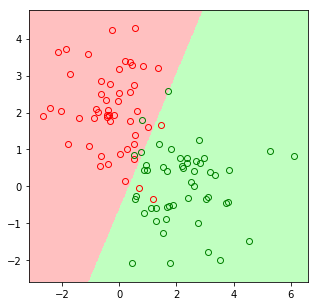

In [24]:
# define a colormap to colorize the class areas
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('colormap',['#FFC0C0', '#C0FFC0'])

# create a mesh of points that cover the full graph area
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
            np.arange(y_min, y_max, h))

# use the classifier to predict the class of each mesh point
Xtest = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(Xtest) #questo predict restituisce valori -1,1
#potremmo usare la funzione predict_proba, non ci dà la classe, ma proprio la
#probabilità

# colorize the graph using the class of each mesh point
Z = Z.reshape(xx.shape)
figure(figsize=(5, 5))
pcolormesh(xx, yy, Z, cmap=cmap)

# plot the red and green class points
plot(samples_red[:,0], samples_red[:,1], 'o', mec='r', mfc='none')
plot(samples_green[:,0], samples_green[:,1], 'o', mec='g', mfc='none')

In [25]:
model.predict(Xtest)

array([-1, -1, -1, ...,  1,  1,  1])

In [26]:
model.predict_proba(Xtest)
#es: primo punto ha prob 97.5% di essere +1,  prob 2.5% di essere -1

array([[9.87278175e-01, 1.27218248e-02],
       [9.86743901e-01, 1.32560985e-02],
       [9.86187504e-01, 1.38124960e-02],
       ...,
       [5.14707676e-04, 9.99485292e-01],
       [4.93705964e-04, 9.99506294e-01],
       [4.73560783e-04, 9.99526439e-01]])

In [27]:
model.predict_proba(Xtest)[:,1] 
#predict_proba, però andiamo a vedere solo la prob di essere classe 1

array([0.01272182, 0.0132561 , 0.0138125 , ..., 0.99948529, 0.99950629,
       0.99952644])